## Iris 데이터로 산점도 그래프를 활용하여 시각화 대시보드를 구현해보자!
- 학습용 iris 데이터 활용

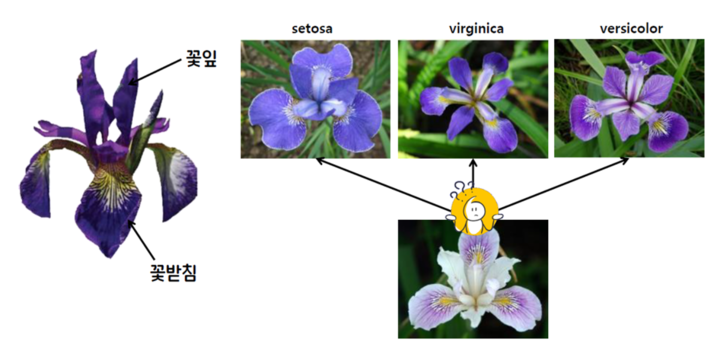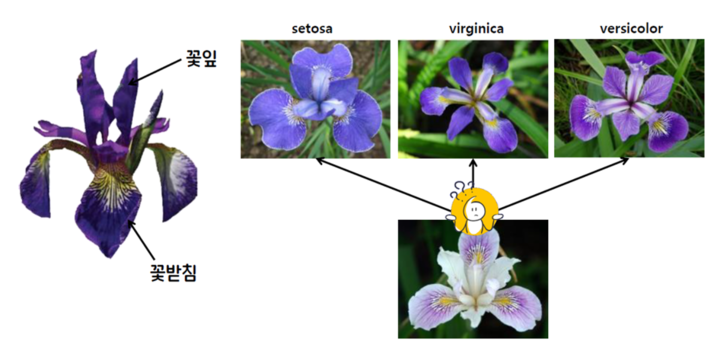

In [2]:
import seaborn as sns
df_iris = sns.load_dataset('iris')
df_iris

# sepal_length : 꽃받침의 길이
# sepal_width : 꽃받침의 너비
# petal_length : 꽃잎의 길이
# petal_width : 꽃잎의 너비
# species : 붓꽃(iris)의 품종

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df_iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

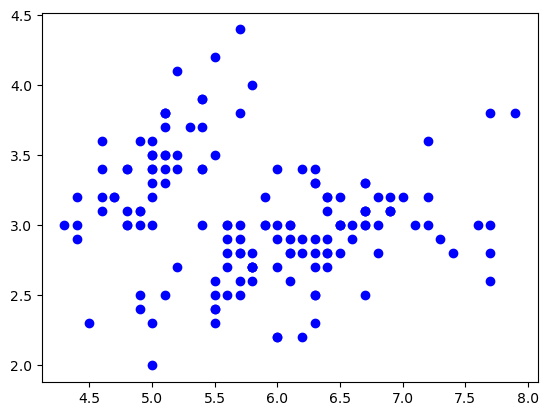

In [6]:
# scatter : 산점도 그래프
import matplotlib.pyplot as plt
plt.scatter(df_iris['sepal_length'], df_iris['sepal_width'], color='blue');      # (x축값, y축값)

### Streamlit을 활용한 시각화 대시보드 구현

In [24]:
%%writefile module/myApp19.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 메인 타이틀(streamlit에는 중앙 정령 기능이 따로 없어 컬럼 레이아웃을 만들고 비율을 조정하여 넣기)
_, col, _ = st.columns([1,3,1])
col.header('Iris 데이터 시각화')
''
df_iris = sns.load_dataset('iris')
st.dataframe(df_iris)

# 2. 데이터를 필터링 할 수 있는 사이드바 설정
with st.sidebar :
    sel_x = st.selectbox('x축 특성 선택 :', df_iris.columns[:-1], key=1)
    sel_y = st.selectbox('y축 특성 선택 :', df_iris.columns[:-1], key=2)
    sel_species = st.multiselect('품종 선택 (:blue[**다중선택 가능**]) :', df_iris['species'].unique())
    #st.write(type(sel_species))     # builtins.list : streamlit에 내장된 리스트 타입 함수
    
    # 투명도 설정은 0~1사이의 실수값으로 그래픽의 투명도를 지정 가능(0:투명, 1:불투명)
    sel_alpha = st.slider('투명도(alpha값) 설정:', 0.1, 1.0, 1.0)   # 최소값, 최대값, 초기값

# 3. 선택된 븟꽃 품종별 산점도(scatter) 차트로 시각화
 # 품종별 차트에 표시될 색상 문자열 지정
colors = {'setosa':'red', 'versicolor':'blue', 'virginica':'green'}

# 사용자가 사이드 바에서 품종을 선택했을 경우 (리스트에 값이 들어가면!)
if sel_species :
    fig = plt.figure(figsize=(7,5))
    plt.title('Iris Scatter plot')
    # 사용자가 선택한 품종에 따라 산점도 그래프 출력(scatter함수 내에 color속성에 colors, alpha 속성에 sel_alpha로 지정할 것!)
    for i in sel_species :
        # 품종에 맞는 DF 추출                         ***
        df = df_iris[df_iris['species']==i]
        # 산점도 그래프 출력
        plt.scatter(df[sel_x], df[sel_y], color=colors[i], alpha=sel_alpha, label=i)

    plt.xlabel(sel_x)    # x축 라벨
    plt.ylabel(sel_y)    # y축 라벨
    plt.legend()         # 범례
    st.pyplot(fig)

# 품종이 선택되지 않은 경우
else : 
    st.warning('좌측 사이드바에서 붓꽃의 유형을 선택해주세요.😒')

Overwriting module/myApp19.py


In [10]:
df_iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [11]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)